# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [5]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [6]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [7]:
df.isna().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [5]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeClassifier(random_state=1)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [9]:
X=df.drop(['Label'],axis=1)
y=df['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()#solver='liblinear',C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
predicted_dt=dt.predict(X_test)
predicted_log=logreg.predict(X_test)

## Metricas de evaluación de los modelos

Primero se evaluará el arbol de decision

In [18]:
print("F1:",metrics.f1_score(y_test,predicted_dt))
print("Accuracy:",metrics.accuracy_score(y_test,predicted_dt))
print("FBeta_Score:",metrics.fbeta_score(y_test, predicted_dt, average='binary', beta=10))

F1: 0.12457912457912457
Accuracy: 0.9886408318406221
FBeta_Score: 0.13433265034688524


Ahora igual para regresión

In [19]:
print("F1:",metrics.f1_score(y_test,predicted_log))
print("Accuracy:",metrics.accuracy_score(y_test,predicted_log))
print("FBeta_Score:",metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))

F1: 0.0
Accuracy: 0.993949058499716
FBeta_Score: 0.0


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [25]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [73]:
Metricas= pd.DataFrame(columns=[list(range(4))])
i=0
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 42)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #print('Muestras en cero:',(y_u == 0).sum())
    #print('Muestras en uno:',(y_u == 1).sum())
    logreg.fit(X_u, y_u)
    dt.fit(X_u, y_u)
    predicted_dt=dt.predict(X_test)
    predicted_log=logreg.predict(X_test)
    Metricas[i]=('Logistic','F1',target_percentage,metrics.f1_score(y_test,predicted_log))
    i=i+1
    Metricas[i]=('Logistic','Accuracy',target_percentage,metrics.accuracy_score(y_test,predicted_log))
    i=i+1
    Metricas[i]=('Logistic','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
    i=i+1
    Metricas[i]=('Tree','F1',target_percentage,metrics.f1_score(y_test,predicted_dt))
    i=i+1
    Metricas[i]=('Tree','Accuracy',target_percentage,metrics.f1_score(y_test,predicted_dt))
    i=i+1
    Metricas[i]=('Tree','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_dt, average='binary', beta=10))
    i=i+1    

Target percentage 0.1
y.shape =  5084 y.mean() =  0.1026750590086546
Target percentage 0.2
y.shape =  2557 y.mean() =  0.2041454829878764
Target percentage 0.3
y.shape =  1731 y.mean() =  0.30155979202772965
Target percentage 0.4
y.shape =  1295 y.mean() =  0.40308880308880307
Target percentage 0.5
y.shape =  1020 y.mean() =  0.5117647058823529


In [74]:
Metricas.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Logistic,Logistic,Logistic,Tree,Tree,Tree,Logistic,Logistic,Logistic,Tree,...,Logistic,Tree,Tree,Tree,Logistic,Logistic,Logistic,Tree,Tree,Tree
1,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,...,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score
2,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5
3,0.0130719,0.990104,0.010945,0.0501012,0.0501012,0.320717,0.0225179,0.979138,0.0393944,0.0396951,...,0.294664,0.0282039,0.0282039,0.438896,0.0206369,0.614356,0.415151,0.0225757,0.0225757,0.415162


In [75]:
MetricasT=Metricas.T

In [81]:
MetricasT.columns = ['Model','Metric','Target_Percentage','Metric_Value']
MetricasT[MetricasT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])


,Model,Metric,Target_Percentage,Metric_Value
2,Logistic,FBeta_Score,0.1,0.010945
8,Logistic,FBeta_Score,0.2,0.0393944
14,Logistic,FBeta_Score,0.3,0.186228
20,Logistic,FBeta_Score,0.4,0.294664
26,Logistic,FBeta_Score,0.5,0.415151
5,Tree,FBeta_Score,0.1,0.320717
11,Tree,FBeta_Score,0.2,0.407806
17,Tree,FBeta_Score,0.3,0.403046
23,Tree,FBeta_Score,0.4,0.438896
29,Tree,FBeta_Score,0.5,0.415162


Para la metrica del FBeta_Score que puede ser la más acertada para este tipo de casos se tiene un incremento en el valor de la métrica a medida que se realiza un balanceo de la base de datos, en regresión logística la mejor mética se da en el 50% y para árboles de decisión se da en el 40%

# Exercise 15.3

Same analysis using random-over-sampling

In [111]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return filter_#X.iloc[filter_,:], y.loc[filter_]

In [229]:
Metricas= pd.DataFrame(columns=[list(range(4))])
i=0
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    #X_u_2, y_u_2 = OverSampling(X_train, y_train, target_percentage, 42)
    indx=OverSampling(X_train, y_train, target_percentage, 42)
    X_u=X_train.iloc[indx,:]
    y_u=y_train.iloc[indx]
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #print('Muestras en cero:',(y_u == 0).sum())
    #print('Muestras en uno:',(y_u == 1).sum())
    logreg.fit(X_u, y_u)
    dt.fit(X_u, y_u)
    predicted_dt=dt.predict(X_test)
    predicted_log=logreg.predict(X_test)
    Metricas[i]=('Logistic','F1',target_percentage,metrics.f1_score(y_test,predicted_log))
    i=i+1
    Metricas[i]=('Logistic','Accuracy',target_percentage,metrics.accuracy_score(y_test,predicted_log))
    i=i+1
    Metricas[i]=('Logistic','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
    i=i+1
    Metricas[i]=('Tree','F1',target_percentage,metrics.f1_score(y_test,predicted_dt))
    i=i+1
    Metricas[i]=('Tree','Accuracy',target_percentage,metrics.f1_score(y_test,predicted_dt))
    i=i+1
    Metricas[i]=('Tree','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_dt, average='binary', beta=10))
    i=i+1    

Target percentage 0.1
y.shape =  102690 y.mean() =  0.1
Target percentage 0.2
y.shape =  115526 y.mean() =  0.19999826878797847
Target percentage 0.3
y.shape =  132030 y.mean() =  0.3
Target percentage 0.4
y.shape =  154035 y.mean() =  0.4
Target percentage 0.5
y.shape =  184842 y.mean() =  0.5


In [121]:
MetricasT=Metricas.T

In [122]:
MetricasT.columns = ['Model','Metric','Target_Percentage','Metric_Value']
MetricasT[MetricasT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
2,Logistic,FBeta_Score,0.1,0
8,Logistic,FBeta_Score,0.2,0
14,Logistic,FBeta_Score,0.3,0.180163
20,Logistic,FBeta_Score,0.4,0.277297
26,Logistic,FBeta_Score,0.5,0.433233
5,Tree,FBeta_Score,0.1,0.134424
11,Tree,FBeta_Score,0.2,0.130923
17,Tree,FBeta_Score,0.3,0.141828
23,Tree,FBeta_Score,0.4,0.123703
29,Tree,FBeta_Score,0.5,0.123668


El OverSampling parece tener unos resultados inferiores a los obtenidos a partir del UnderSampling, las mejores particiones se presentan al igual que en el caso anterior en el 40 y 50%

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [227]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice((y[y==1].index), n_samples_1_new)
    #sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X.loc[sel,:] - step * (X.loc[sel,:] - X.loc[ind[nn_],:])
        #new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  123228 y.mean() =  0.25


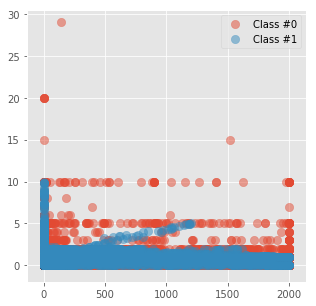

Target percentage 0.25 k  15
y.shape =  123228 y.mean() =  0.25


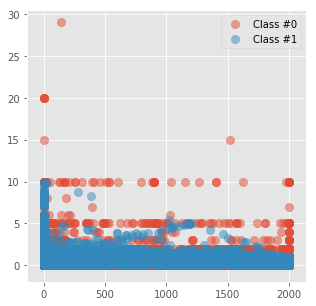

Target percentage 0.5 k  5
y.shape =  184842 y.mean() =  0.5


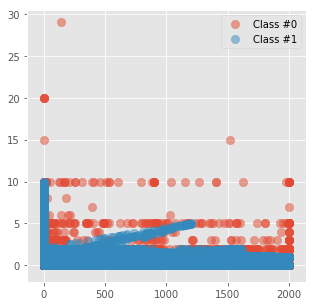

Target percentage 0.5 k  15
y.shape =  184842 y.mean() =  0.5


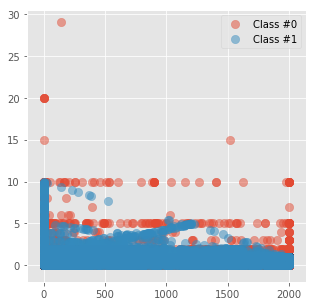

In [230]:
Metricas_Smote= pd.DataFrame(columns=[list(range(2))])
i=0
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        logreg.fit(X_u, y_u)
        dt.fit(X_u, y_u)
        predicted_dt=dt.predict(X_test)
        predicted_log=logreg.predict(X_test)
        Metricas_Smote[i]=('Logistic','F1',target_percentage,metrics.f1_score(y_test,predicted_log))
        i=i+1
        Metricas_Smote[i]=('Logistic','Accuracy',target_percentage,metrics.accuracy_score(y_test,predicted_log))
        i=i+1
        Metricas_Smote[i]=('Logistic','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
        i=i+1
        Metricas_Smote[i]=('Tree','F1',target_percentage,metrics.f1_score(y_test,predicted_dt))
        i=i+1
        Metricas_Smote[i]=('Tree','Accuracy',target_percentage,metrics.f1_score(y_test,predicted_dt))
        i=i+1
        Metricas_Smote[i]=('Tree','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_dt, average='binary', beta=10))
        i=i+1    
        #plot_two_classes(X_u, y_u, size=(5, 5))
        #plt.show()    

In [231]:
Metricas_Smote

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Logistic,Logistic,Logistic,Tree,Tree,Tree,Logistic,Logistic,Logistic,Tree,...,Logistic,Tree,Tree,Tree,Logistic,Logistic,Logistic,Tree,Tree,Tree
1,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,...,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score
2,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,0.0303652,0.948381,0.125986,0.0829987,0.0829987,0.111933,0.0402901,0.947966,0.169994,0.0868597,...,0.358873,0.0887728,0.0887728,0.122682,0.0223087,0.670672,0.407363,0.0733591,0.0733591,0.135806


In [252]:
Metricas_SmoteT=Metricas_Smote.T
Metricas_SmoteT.columns = ['Model','Metric','Target_Percentage','Metric_Value']
Metricas_SmoteT[Metricas_SmoteT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
2,Logistic,FBeta_Score,0.25,0.125986
8,Logistic,FBeta_Score,0.25,0.169994
14,Logistic,FBeta_Score,0.5,0.358873
20,Logistic,FBeta_Score,0.5,0.407363
5,Tree,FBeta_Score,0.25,0.111933
11,Tree,FBeta_Score,0.25,0.140063
17,Tree,FBeta_Score,0.5,0.122682
23,Tree,FBeta_Score,0.5,0.135806


In [253]:
#columnas=Metricas_SmoteT.columns
#columnas
#Metricas_SmoteT.columns=('Model', 'Metric', 'Target_Percentage', 'Metric_Value','k-value')
Metricas_SmoteT['K-value']=0
Metricas_SmoteT

,Model,Metric,Target_Percentage,Metric_Value,K-value
0,Logistic,F1,0.25,0.0303652,0
1,Logistic,Accuracy,0.25,0.948381,0
2,Logistic,FBeta_Score,0.25,0.125986,0
3,Tree,F1,0.25,0.0829987,0
4,Tree,Accuracy,0.25,0.0829987,0
5,Tree,FBeta_Score,0.25,0.111933,0
6,Logistic,F1,0.25,0.0402901,0
7,Logistic,Accuracy,0.25,0.947966,0
8,Logistic,FBeta_Score,0.25,0.169994,0
9,Tree,F1,0.25,0.0868597,0


In [263]:
Metricas_SmoteT

,Model,Metric,Target_Percentage,Metric_Value,K-value
0,Logistic,F1,0.25,0.0303652,5
1,Logistic,Accuracy,0.25,0.948381,5
2,Logistic,FBeta_Score,0.25,0.125986,5
3,Tree,F1,0.25,0.0829987,5
4,Tree,Accuracy,0.25,0.0829987,5
5,Tree,FBeta_Score,0.25,0.111933,5
6,Logistic,F1,0.25,0.0402901,15
7,Logistic,Accuracy,0.25,0.947966,15
8,Logistic,FBeta_Score,0.25,0.169994,15
9,Tree,F1,0.25,0.0868597,15


In [262]:
for i in range(0,6):#[5, 15]:
    Metricas_SmoteT.loc[i,'K-value']=5

for i in range(12,18):#[5, 15]:
    Metricas_SmoteT.loc[i,'K-value']=5    
    
    
for i in range(6,12):#[5, 15]:
    Metricas_SmoteT.loc[i,'K-value']=15
    
for i in range(18,24):#[5, 15]:
    Metricas_SmoteT.loc[i,'K-value']=15  

In [264]:
Metricas_SmoteT[Metricas_SmoteT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value,K-value
2,Logistic,FBeta_Score,0.25,0.125986,5
8,Logistic,FBeta_Score,0.25,0.169994,15
14,Logistic,FBeta_Score,0.5,0.358873,5
20,Logistic,FBeta_Score,0.5,0.407363,15
5,Tree,FBeta_Score,0.25,0.111933,5
11,Tree,FBeta_Score,0.25,0.140063,15
17,Tree,FBeta_Score,0.5,0.122682,5
23,Tree,FBeta_Score,0.5,0.135806,15


Al igual que con el undersampling el smote genera mejores resultados cuando se balancea mejor en el caso de regresión logistica, para arboles de decisión el valor es muy similar en ambos casos.

Respecto al valor del parámetro K se tiene un incremento en los modelos entre mayor sea el valor de K

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [268]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)

X_res, y_res = ada.fit_resample(X_train, y_train)
logreg.fit(X_res, y_res)
dt.fit(X_res, y_res)
predicted_dt=dt.predict(X_test)
predicted_log=logreg.predict(X_test)

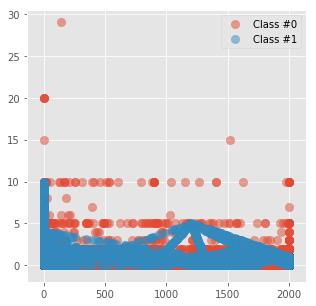

Resampled dataset shape Counter({0: 92421, 1: 92316})


In [271]:
Metricas_ADASYN= pd.DataFrame(columns=[list(range(2))])
i=0
Metricas_ADASYN[i]=('Logistic','F1',metrics.f1_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN[i]=('Logistic','Accuracy',metrics.accuracy_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN[i]=('Logistic','FBeta_Score',metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
i=i+1
Metricas_ADASYN[i]=('Tree','F1',metrics.f1_score(y_test,predicted_dt))
i=i+1
Metricas_ADASYN[i]=('Tree','Accuracy',metrics.f1_score(y_test,predicted_dt))
i=i+1
Metricas_ADASYN[i]=('Tree','FBeta_Score',metrics.fbeta_score(y_test, predicted_dt, average='binary', beta=10))

    
#plot_two_classes(X_res, y_res, size=(5, 5))
#plt.show()    


print('Resampled dataset shape %s' % Counter(y_res))

In [272]:
Metricas_ADASYN

,0,1,2,3,4,5
0,Logistic,Logistic,Logistic,Tree,Tree,Tree
1,F1,Accuracy,FBeta_Score,F1,Accuracy,FBeta_Score
2,0.0200537,0.577286,0.425743,0.0838323,0.0838323,0.12598


In [277]:
Metricas_ADASYNT=Metricas_ADASYN.T
Metricas_ADASYNT.columns = ['Model','Metric','Metric_Value']

# Exercise 15.6 (3 points)

Compare and comment about the results

Primero los resultados del undersample

In [294]:
MetricasT[MetricasT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
2,Logistic,FBeta_Score,0.1,0
8,Logistic,FBeta_Score,0.2,0
14,Logistic,FBeta_Score,0.3,0.180163
20,Logistic,FBeta_Score,0.4,0.277297
26,Logistic,FBeta_Score,0.5,0.433233
5,Tree,FBeta_Score,0.1,0.134424
11,Tree,FBeta_Score,0.2,0.130923
17,Tree,FBeta_Score,0.3,0.141828
23,Tree,FBeta_Score,0.4,0.123703
29,Tree,FBeta_Score,0.5,0.123668


In [301]:
MetricasT2=MetricasT[MetricasT['Target_Percentage'] == 0.5]
MetricasT2[MetricasT2['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage']).iloc[:,3].mean()

0.27845049645779585

El promedio para el 50% de balanceo utilizando under sample es 0.27 de F-BetaScore, ahora para Smote

In [302]:
Metricas_SmoteT[Metricas_SmoteT['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value,K-value
2,Logistic,FBeta_Score,0.25,0.125986,5
8,Logistic,FBeta_Score,0.25,0.169994,15
14,Logistic,FBeta_Score,0.5,0.358873,5
20,Logistic,FBeta_Score,0.5,0.407363,15
5,Tree,FBeta_Score,0.25,0.111933,5
11,Tree,FBeta_Score,0.25,0.140063,15
17,Tree,FBeta_Score,0.5,0.122682,5
23,Tree,FBeta_Score,0.5,0.135806,15


In [304]:
Metricas_SmoteT2=Metricas_SmoteT[Metricas_SmoteT['Target_Percentage'] == 0.5]
Metricas_SmoteT2[Metricas_SmoteT2['Metric'] == 'FBeta_Score'].sort_values(by=['Model', 'Target_Percentage']).iloc[:,3].mean()

0.2561810999248728

Para el caso de Smote con el mismo porcentaje de balanceo se tiene un F-BetaScore un poco menor, finalmente el algoritmo ADASYN

In [306]:
Metricas_ADASYNT[Metricas_ADASYNT['Metric'] == 'FBeta_Score'].sort_values(by=['Model'])

,Model,Metric,Metric_Value
2,Logistic,FBeta_Score,0.425743
5,Tree,FBeta_Score,0.12598


In [309]:
Metricas_ADASYNT2=Metricas_ADASYNT#[Metricas_ADASYNT['Target_Percentage'] == 0.5]
Metricas_ADASYNT2[Metricas_ADASYNT2['Metric'] == 'FBeta_Score'].sort_values(by=['Model']).iloc[:,2].mean()

0.2758615192964019

El valor del F-BetaScore para ADASYN es muy similar al obtenido con el under sample y superior al de SMOTE